<a href="https://colab.research.google.com/github/shofiaayuu/PCVK-UAS-Kelompok7/blob/main/KELOMPOK_7_PCVK_SHOFIATUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [5]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [6]:
# Check the label
train_labels.shape

(60000,)

## Combine Train and Test Data

In [9]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [11]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 9')

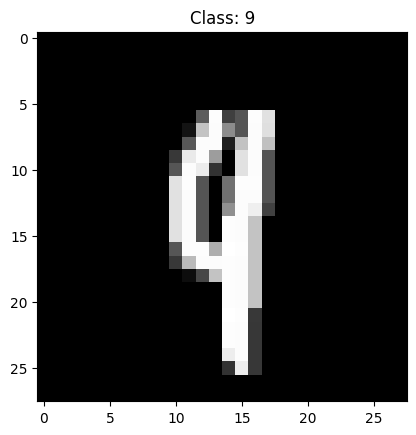

In [12]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

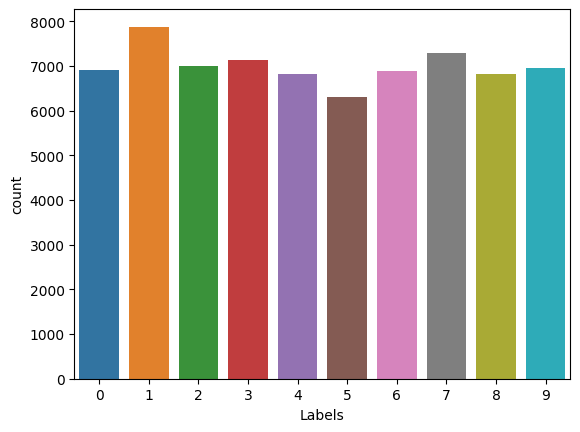

In [13]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [14]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-22 14:12:24--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   137MB/s    in 1.3s    

2023-12-22 14:12:26 (137 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [15]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [16]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
372445    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372446    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372447    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372448    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372449    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[372450 rows x 785 columns]

In [17]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [18]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [19]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [20]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 15.0')

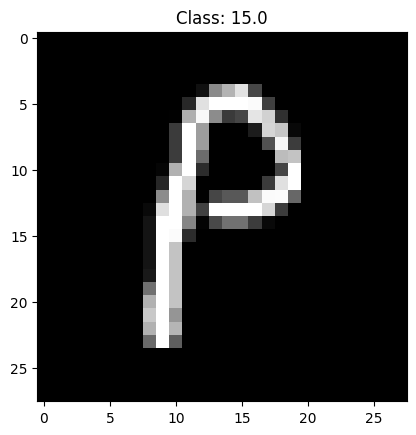

In [21]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

<Axes: xlabel='Labels', ylabel='count'>

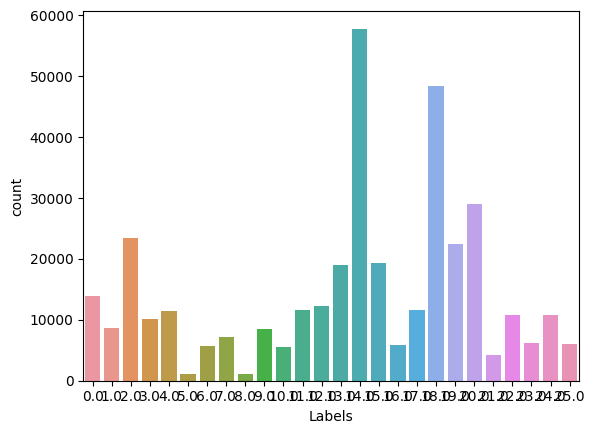

In [22]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggle A-Z)

In [23]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [25]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

In [27]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
data.shape, labels.shape

In [ ]:
# Check labels
np.unique(labels)

In [30]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [31]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Split Data to Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

# Prepocessing





In [ ]:
# Normalize data
data /= 255.0

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

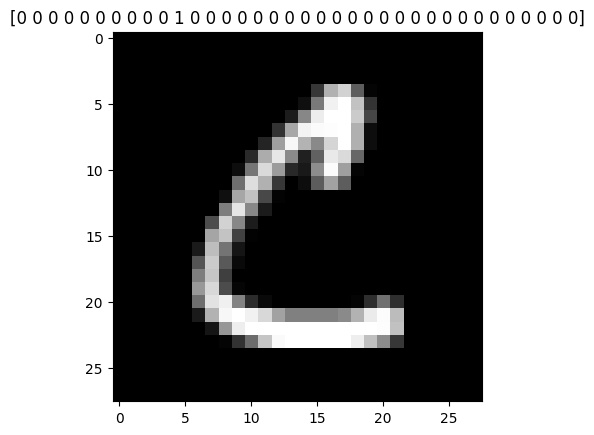

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [ ]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train Model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.2348 - accuracy: 0.8210
Epoch 1: val_loss improved from inf to 0.30192, saving model to custom_ocr.model
2765/2765 [==============================] - 148s 51ms/step - loss: 2.2343 - accuracy: 0.8210 - val_loss: 0.3019 - val_accuracy: 0.8772
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9860 - accuracy: 0.9002
Epoch 2: val_loss improved from 0.30192 to 0.22658, saving model to custom_ocr.model
2765/2765 [==============================] - 158s 57ms/step - loss: 0.9860 - accuracy: 0.9002 - val_loss: 0.2266 - val_accuracy: 0.9199
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8259 - accuracy: 0.9125
Epoch 3: val_loss did not improve from 0.22658
2765/2765 [==============================] - 135s 49ms/step - loss: 0.8258 - accuracy: 0.9125 - val_loss: 0.2453 - val_accuracy: 0.8942
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7257 - accu

## Evaluate Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The result will show in colab directory
save_path ='/content/drive/MyDrive/PCVK_2023/Test PCVK'
network.save(save_path)

In [ ]:
import re
import cv2
import random
import os
from PIL import Image
import subprocess
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours

In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# make a prediction
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([3.12253042e-06, 3.57874397e-09, 6.91017158e-06, 2.74364120e-05,
       3.04629452e-07, 1.18110664e-01, 3.14012993e-07, 9.88418037e-07,
       4.38846314e-07, 7.29286228e-04, 7.45830633e-08, 2.54476706e-09,
       8.84072122e-08, 2.30065598e-06, 1.41276217e-07, 2.48949776e-14,
       2.87562283e-03, 2.83911838e-10, 2.78159809e-18, 5.73545403e-05,
       9.65115661e-12, 2.58636512e-09, 1.26561877e-11, 8.42263947e-09,
       9.56121994e-07, 1.69945444e-08, 6.81395022e-07, 1.33960577e-11,
       8.78183007e-01, 3.60627794e-08, 1.39791254e-07, 1.77897722e-14,
       1.16985390e-08, 1.03456650e-16, 3.48698777e-08, 1.93587244e-08],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])


28

In [ ]:
# Check label for 24
name_labels[28]

'S'

In [ ]:
# Check y_test label for 0
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[10])

28

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[10])]

'S'

In [ ]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 4ms/step - loss: 0.2150 - accuracy: 0.9145


[0.21498864889144897, 0.9145101308822632]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.26      0.74      0.38      1381
           1       0.97      0.99      0.98      1575
           2       0.84      0.98      0.90      1398
           3       0.96      0.99      0.97      1428
           4       0.88      0.98      0.92      1365
           5       0.36      0.97      0.53      1263
           6       0.90      0.99      0.94      1375
           7       0.95      0.99      0.97      1459
           8       0.90      0.99      0.94      1365
           9       0.92      0.99      0.95      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.97      1734
           C       0.99      0.97      0.98      4682
           D       0.90      0.97      0.94      2027
           E       1.00      0.97      0.99      2288
           F       0.97      0.99      0.98       233
           G       0.96      0.92      0.94      1152
           H       0.98    

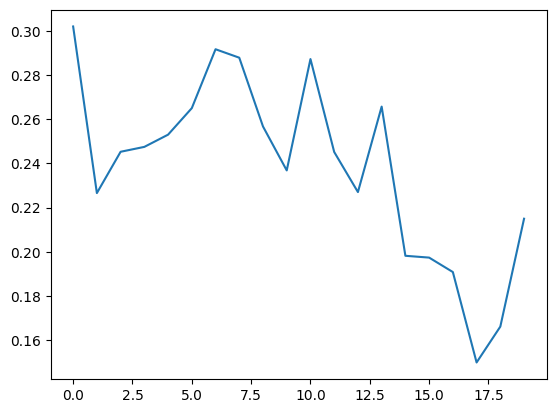

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [ ]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

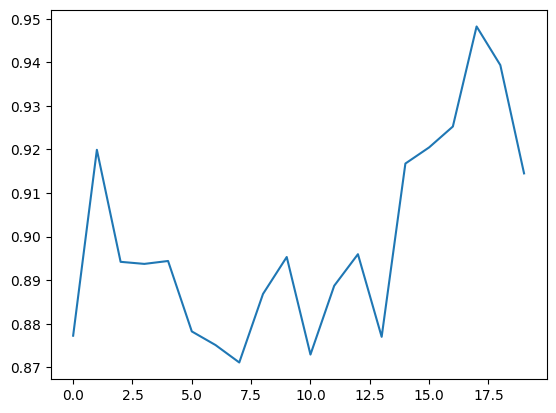

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# OCR RECOCNITON

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils
from imutils.contours import sort_contours

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = [
    '/content/drive/MyDrive/Kelompok 5/3E_2141720247_1 - DHIYA_UDDIN FIRMANSYAH.jpg',
    '/content/drive/MyDrive/Kelompok 5/3E_2141720247_2 - DHIYA_UDDIN FIRMANSYAH.jpg',
    '/content/drive/MyDrive/Kelompok 5/3E_2141720247_3 - DHIYA_UDDIN FIRMANSYAH.jpg',
    '/content/drive/MyDrive/Kelompok 5/3E_2141720247_4 - DHIYA_UDDIN FIRMANSYAH.jpg',
    '/content/drive/MyDrive/Kelompok 5/3E_2141720247_5 - DHIYA_UDDIN FIRMANSYAH.jpg',

]

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

Cropped image saved at: /content/drive/MyDrive/Kelompok 5/cropped_images/cropped_3E_2141720247_1 - DHIYA_UDDIN FIRMANSYAH.jpg


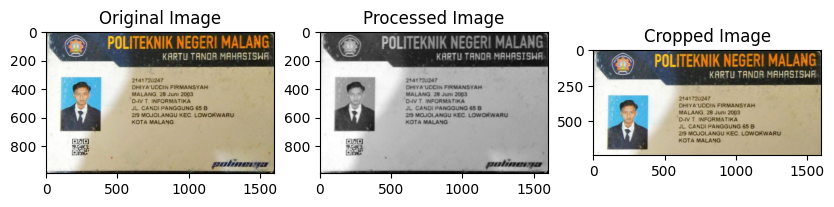

Cropped image saved at: /content/drive/MyDrive/Kelompok 5/cropped_images/cropped_3E_2141720247_2 - DHIYA_UDDIN FIRMANSYAH.jpg


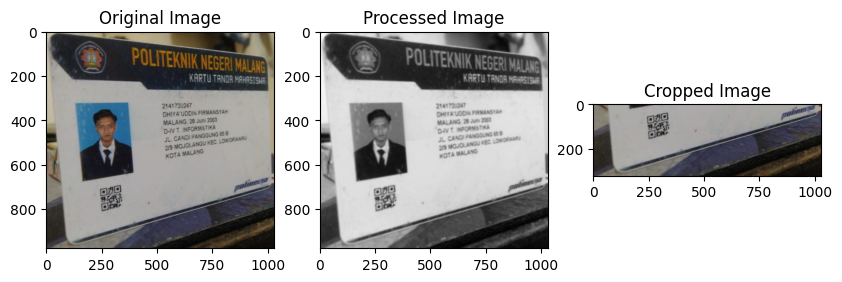

Cropped image saved at: /content/drive/MyDrive/Kelompok 5/cropped_images/cropped_3E_2141720247_3 - DHIYA_UDDIN FIRMANSYAH.jpg


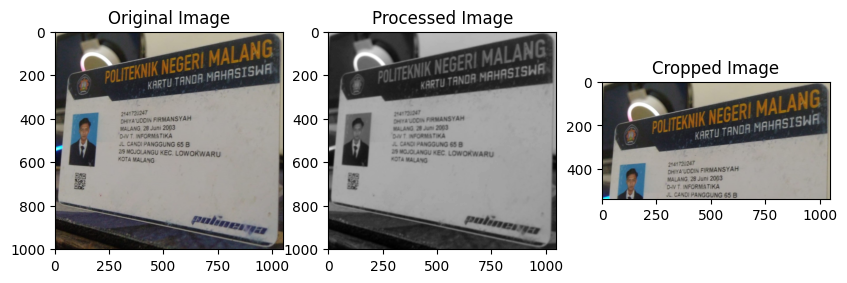

Cropped image saved at: /content/drive/MyDrive/Kelompok 5/cropped_images/cropped_3E_2141720247_4 - DHIYA_UDDIN FIRMANSYAH.jpg


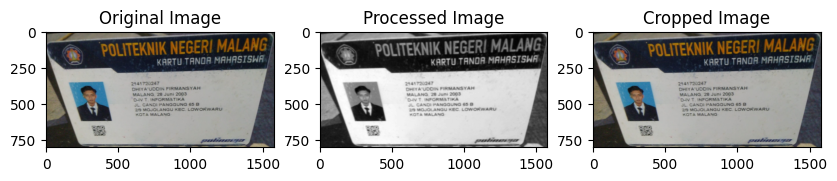

Cropped image saved at: /content/drive/MyDrive/Kelompok 5/cropped_images/cropped_3E_2141720247_5 - DHIYA_UDDIN FIRMANSYAH.jpg


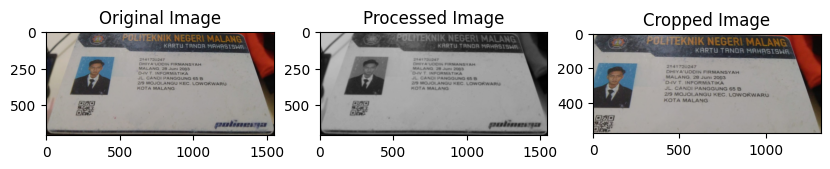

In [ ]:

def load_image(image_path):
    return cv2.imread(image_path)

def preprocess_image(image):
    if image is None:
        print("Error: Image is not loaded.")
        return None

    # mengubah image menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # menggunakan GaussianBlur untuk mengurangi noise
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    blur = cv2.GaussianBlur(blur, (5,5), 0)
    blur = cv2.GaussianBlur(blur, (5,5), 0)
    blur = cv2.GaussianBlur(blur, (5,5), 0)

    return blur

def localization(image):
    kernel = np.ones((5, 5), np.uint8)  # Define a kernel for morphological operations

    edged = cv2.Canny(image, 30, 50)

    dilate = cv2.dilate(edged, kernel, iterations=2)
    opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

    contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    return contours

def cropped(image, contours):
    # Find object with the biggest bounding box
    mx = (0,0,0,0)      # biggest bounding box so far
    mx_area = 0
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        area = w * h
        if area > mx_area:
            mx = x, y, w, h
            mx_area = area
    x, y, w, h = mx

    # Check if the cropping region is valid
    if w > 0 and h > 0:
        # Crop and save
        cropped = image[y:y+h, x:x+w]
        return cropped
    else:
        print("Error: Invalid cropping region.")
        return None



# Folder to save cropped images
cropped_folder = "/content/drive/MyDrive/Kelompok 5/cropped_images"


# Loop through all images in the folder
for image_path in image_path:
    # Load image
    image = cv2.imread(image_path)

    if image is not None:
        # Preprocess image
        processed_image = preprocess_image(image)

        # Get contours
        contours = localization(processed_image)

        # Crop the image
        cropped_image = cropped(image, contours)

        # Display the original image, processed image, and cropped image using matplotlib
        plt.figure(figsize=(10, 7))

        plt.subplot(131)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(132)
        plt.imshow(processed_image, cmap='gray')
        plt.title('Processed Image')

        if cropped_image is not None:
            plt.subplot(133)
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.title('Cropped Image')

            # Save the cropped image
            filename = os.path.join(cropped_folder, "cropped_" + os.path.basename(image_path))
            cv2.imwrite(filename, cropped_image)
            print("Cropped image saved at:", filename)

        plt.show()


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    # Display the original image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    plt.subplot(2, 3, 3)
    plt.imshow(blur, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Apply Adaptive Threshold
    adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    plt.subplot(2, 3, 4)
    plt.imshow(adaptive, cmap='gray')
    plt.title('Adaptive Threshold')
    plt.axis('off')

    # Invert the image
    invertion = 255 - adaptive
    plt.subplot(2, 3, 5)
    plt.imshow(invertion, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')

    # Dilate the image
    dilation = cv2.dilate(invertion, np.ones((3, 3)))
    plt.subplot(2, 3, 6)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return img, gray, dilation

## KTM 1

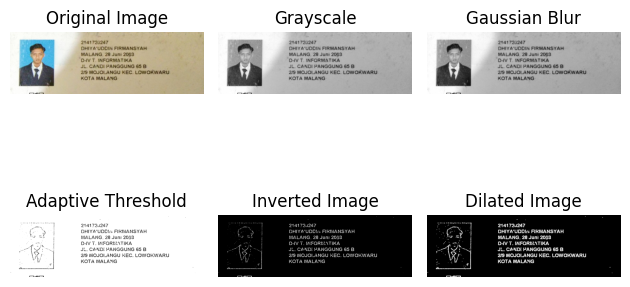

In [ ]:
# Call the function with the image path
image_path = '/content/drive/MyDrive/SEMESTER5/PCVK/data/crop/3E_2141720247_1 - DHIYA_UDDIN FIRMANSYAH.jpg'
img, gray, dilation = preprocess_image(image_path)

In [ ]:
# Define function for contour detection
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts


In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
len(conts)

305

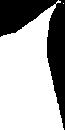

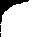

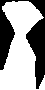

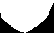

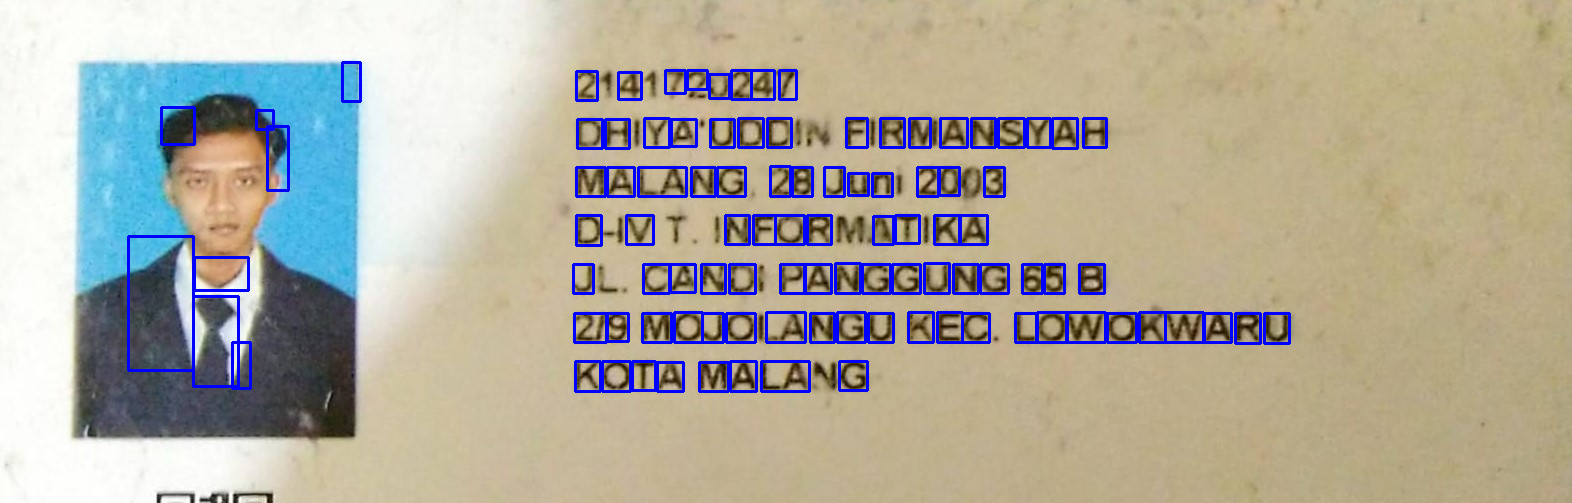

In [ ]:
# Get the char based on contour


# Setup min/max width/hight for char
min_w, max_w = 17, 160
min_h, max_h = 19, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

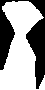

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

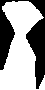

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

# DETECTION

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 17, 160
  min_h, max_h = 19, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
detected_char[0][1]

(128, 236, 69, 136)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(101, 28, 28, 1)

## Recognize Char

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# Predict
preds = load_network.predict(pixels)

4/4 [==============================] - 0s 53ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

1 M 8 O 1 A P B J H K D M 2 D 0 H 9 A 8 V T W M C V A T A D 0 7 N M N U U U G N 0 D A 2 D 8 F W A C 2 0 7 P 8 A R N J N G 0 F U G U O 7 R G T Z N 2 U K E O A N A C N G 3 S L 8 V 0 5 A W B H 0 K W A R U 

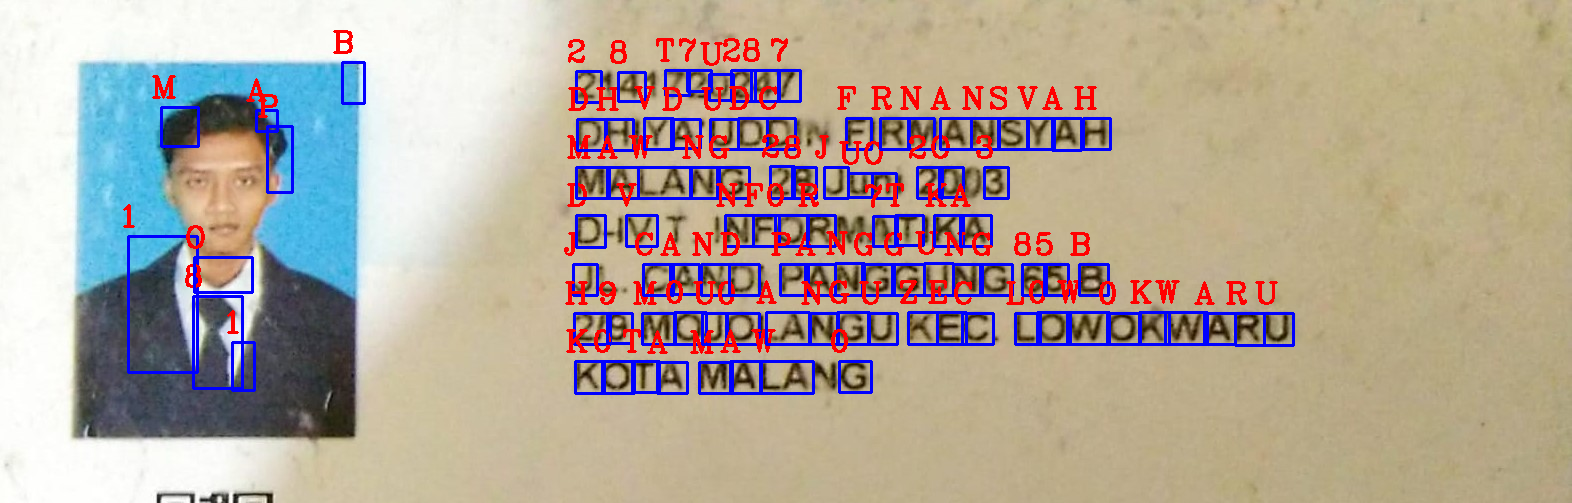

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

## KTM 2

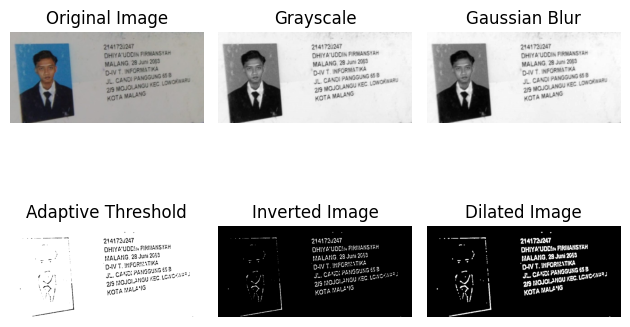

In [ ]:
# Call the function with the image path
image_path = '/content/drive/MyDrive/Kelompok 5/crop/3E_2141720247_2 - DHIYA_UDDIN FIRMANSYAH.jpg'
img, gray, dilation = preprocess_image(image_path)

In [ ]:
# Define function for contour detection
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts



In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
len(conts)

206

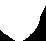

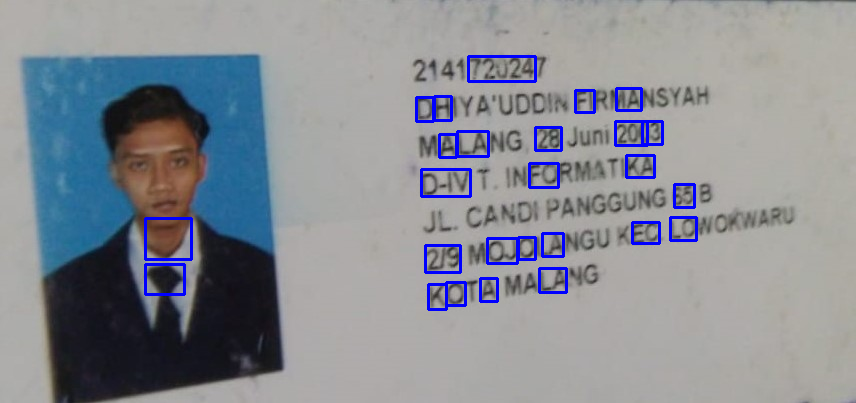

In [ ]:
# Get the char based on contour


# Setup min/max width/hight for char
min_w, max_w = 17, 160
min_h, max_h = 19, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

DETECTION

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 17, 160
  min_h, max_h = 19, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
detected_char[0][1]

(145, 264, 43, 32)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(26, 28, 28, 1)

RECOGNIZE CHAR

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# Predict
preds = load_network.predict(pixels)

1/1 [==============================] - 0s 242ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

O O D M D K H A 0 U M A Q O A D U 2 A M M M 8 B W B 

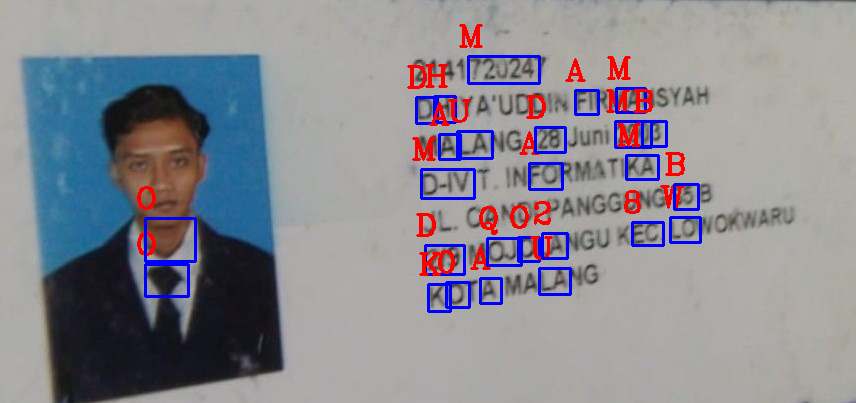

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

## KTM 3


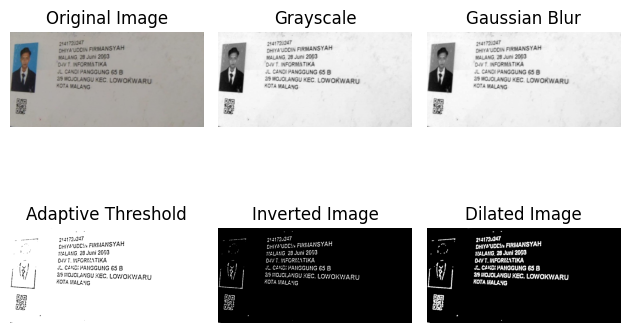

In [ ]:
# Call the function with the image path
image_path = '/content/drive/MyDrive/Kelompok 5/crop/3E_2141720247_3 - DHIYA_UDDIN FIRMANSYAH.jpg'
img, gray, dilation = preprocess_image(image_path)

In [ ]:
# Define function for contour detection
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts

In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
len(conts)

166

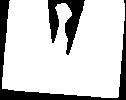

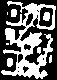

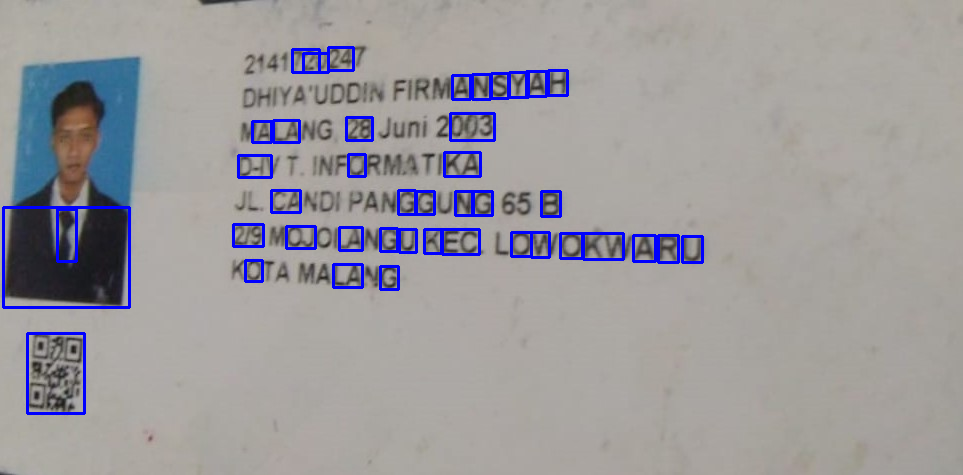

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 17, 160
min_h, max_h = 19, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

DETECTION

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 17, 160
  min_h, max_h = 19, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
detected_char[0][1]

(3, 207, 130, 102)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(42, 28, 28, 1)

RECOGNIZE CHAR

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# Predict
preds = load_network.predict(pixels)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

W B 8 D M 0 A U U W D 2 U U 4 D 0 G G G U G K 8 M M A N N G S Y O A M B H O M A R U 

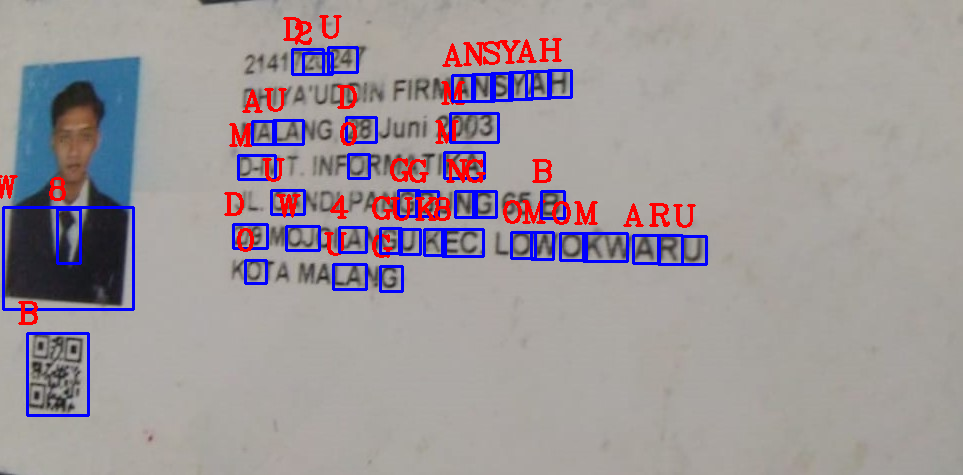

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

## KTM 4

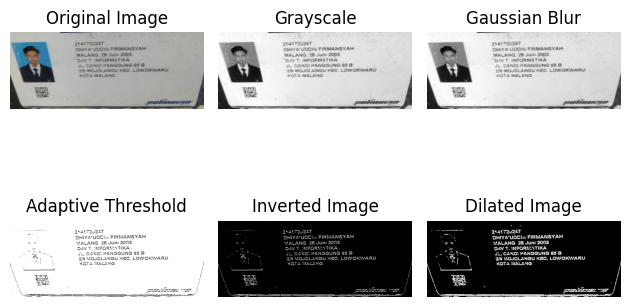

In [ ]:
# Call the function with the image path
image_path = '/content/drive/MyDrive/Kelompok 5/crop/3E_2141720247_4 - DHIYA_UDDIN FIRMANSYAH.jpg'
img, gray, dilation = preprocess_image(image_path)

In [ ]:
# Define function for contour detection
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts

In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
len(conts)

307

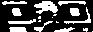

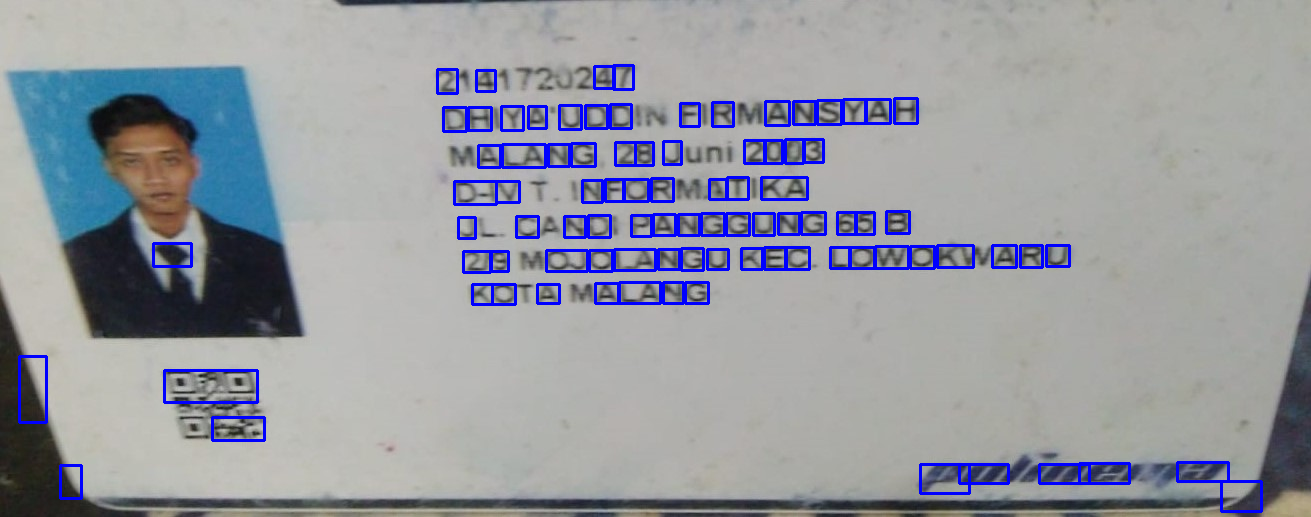

In [ ]:
# Get the char based on contour


# Setup min/max width/hight for char
min_w, max_w = 17, 160
min_h, max_h = 19, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

DETECTION

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 17, 160
  min_h, max_h = 19, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
detected_char[0][1]

(19, 356, 31, 68)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(91, 28, 28, 1)

RECOGNIZE CHAR

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# Predict
preds = load_network.predict(pixels)

3/3 [==============================] - 0s 80ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

1 L O M W 2 D H J 2 H K 4 A 9 0 V V G C D A Q N U N G N D D O 4 A F E J U 2 W 0 P B R A N 4 J N F G G O U 2 R G T K 2 U M E D A N C O N Q 3 S L G V 0 5 A W B H O R M M A R M U M W 2 

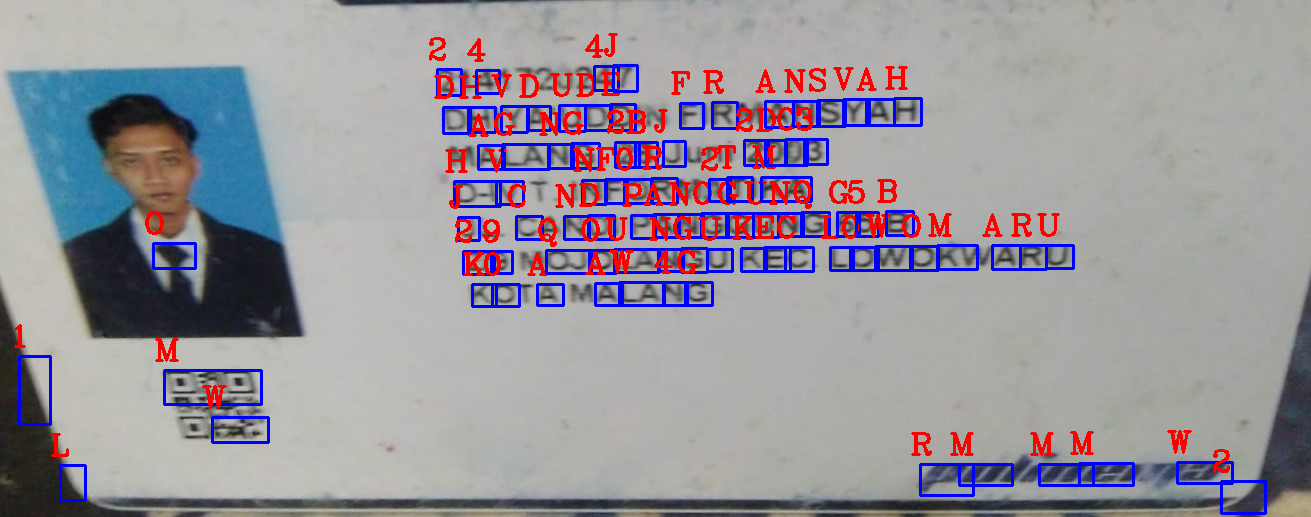

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

## KTM 5

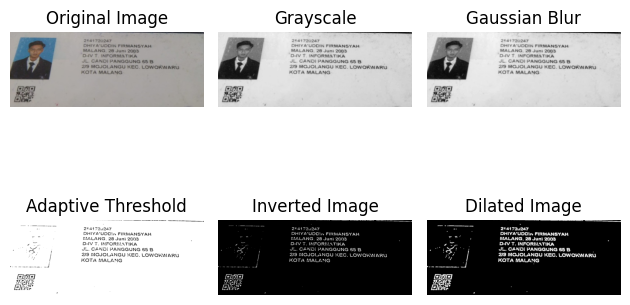

In [ ]:
# Call the function with the image path
image_path = '/content/drive/MyDrive/Kelompok 5/crop/3E_2141720247_5 - DHIYA_UDDIN FIRMANSYAH.jpg'
img, gray, dilation = preprocess_image(image_path)

In [ ]:
# Define function for contour detection
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts

In [ ]:
conts = find_contours(dilation.copy())

In [ ]:
len(conts)

215

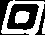

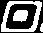

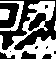

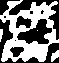

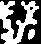

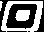

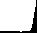

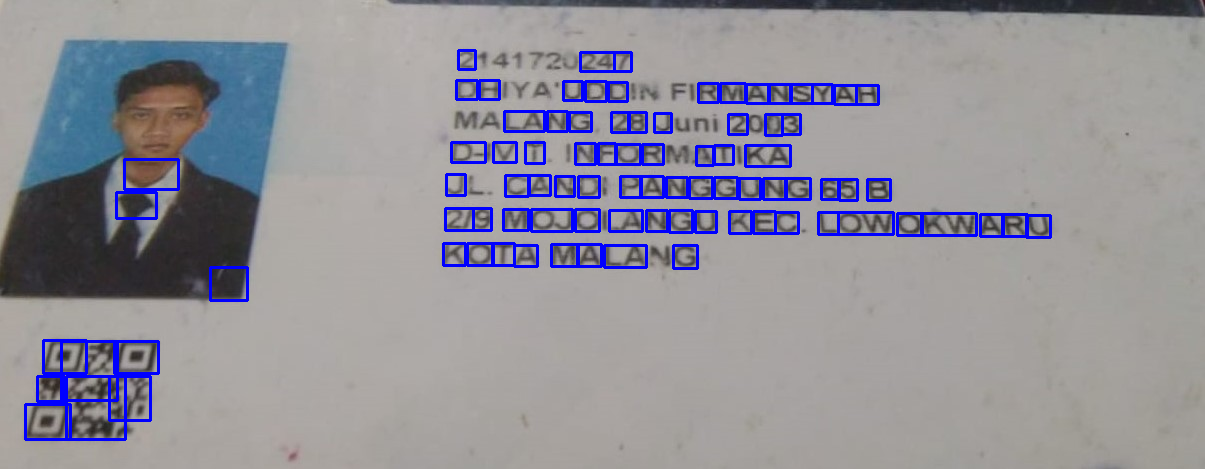

In [ ]:
# Get the char based on contour


# Setup min/max width/hight for char
min_w, max_w = 17, 160
min_h, max_h = 19, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

# Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

# Resizing
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

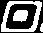

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

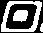

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

DETECTION

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 17, 160
  min_h, max_h = 19, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
detected_char[0][1]

(25, 404, 49, 37)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(88, 28, 28, 1)

RECOGNIZE CHAR

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
save_path = '/content/drive/MyDrive/PCVK_2023/Test PCVK'
load_network = load_model(save_path)

In [ ]:
# Predict
preds = load_network.predict(pixels)

3/3 [==============================] - 0s 90ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

Q 2 Q B B H 0 O O J K 2 J D D 2 0 9 H T V M U C A T A Q N M N U G 0 N A D 2 D F M D A 2 7 0 P 8 A R N J N G G G U 2 R G T M 2 K U M A E N O N C 3 G S V L 8 A M 5 H B O M A R U 

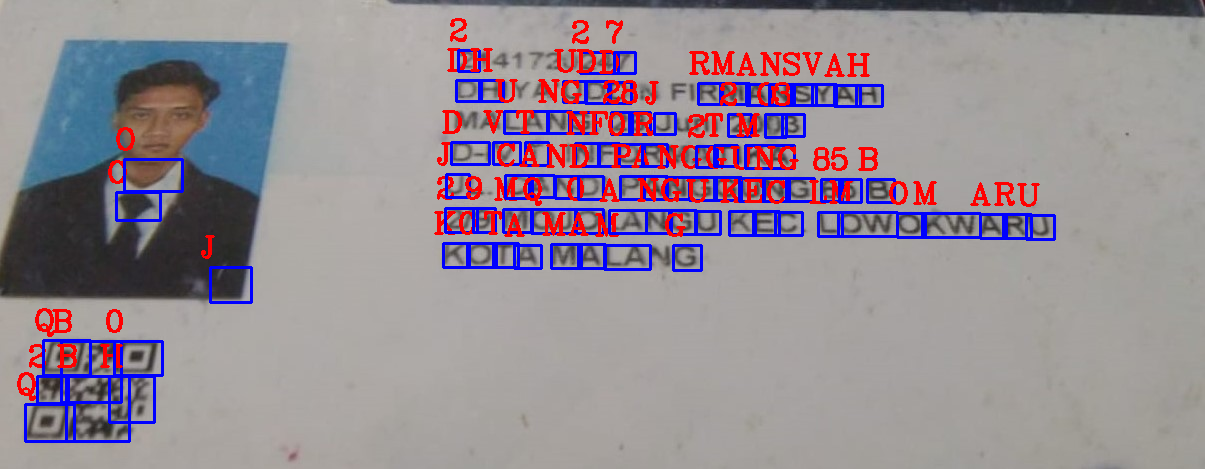

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)